<a href="https://colab.research.google.com/github/la-elias/Hackathon2020/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.exceptions import YellowbrickValueError
from yellowbrick.cluster import InterclusterDistance
from sklearn.decomposition import TruncatedSVD
#Metrics libraries
from sklearn import cluster, mixture
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
dataset=pd.read_csv('https://raw.githubusercontent.com/la-elias/Hackathon2020/master/minagri2.csv', delimiter=',')
dataset.head()

,Column1,IN_PERSONAL_ANNO,IN_PERSONAL_MES,VC_PERSONAL_REGIMEN_LABORAL,VC_PERSONAL_CARGO,VC_PERSONAL_DEPENDENCIA,MO_PERSONAL_REMUNERACIONES,MO_PERSONAL_HONORARIOS,MO_PERSONAL_INCENTIVO,MO_PERSONAL_GRATIFICACION,MO_PERSONAL_OTROS_BENEFICIOS,MO_PERSONAL_TOTAL,VC_PERSONAL_OBSERVACIONES,FEC_REG,gender,male,female
0,798,2019,7,2,ABOGADO IV,PROCURADURÃA PÃšBLICA,0.00,0.0,0,300,0,0.00,LICENCIA SIN GOCE,8/14/2019 10:09:16 AM,male,1,0
1,858,2019,7,2,ABOGADO IV,OFICINA GENERAL DE ASESORÃA JURÃDICA,655.57,0.0,2783,300,0,3438.90,NINGUNA,8/14/2019 10:09:16 AM,male,1,0
2,887,2019,7,2,ABOGADO IV,PROCURADURÃA PÃšBLICA,532.77,0.0,2783,300,0,3316.10,NINGUNA,8/14/2019 10:09:16 AM,male,1,0
3,897,2019,7,2,ABOGADO IV,PROCURADURÃA PÃšBLICA,602.62,0.0,3013,300,0,3615.95,NINGUNA,8/14/2019 10:09:16 AM,female,0,1
4,673,2019,7,2,ANALISTA DE SISTEMA PAD III,DIRECCIÃ“N DE ESTADÃSTICA AGRARIA,605.62,0.0,3013,300,0,3618.95,NINGUNA,8/14/2019 10:09:16 AM,male,1,0


In [14]:
len(dataset.columns)

17

In [15]:
dataset.describe()

,Column1,IN_PERSONAL_ANNO,IN_PERSONAL_MES,VC_PERSONAL_REGIMEN_LABORAL,MO_PERSONAL_REMUNERACIONES,MO_PERSONAL_HONORARIOS,MO_PERSONAL_INCENTIVO,MO_PERSONAL_GRATIFICACION,MO_PERSONAL_OTROS_BENEFICIOS,MO_PERSONAL_TOTAL,male,female
count,4613.000000,4613.0,4613.0,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000,4613.000000
mean,2306.000000,2019.0,7.0,6.650119,1660.702697,67.455740,153.972252,50.123347,268.285281,2164.951200,0.432473,0.567527
std,1331.802726,0.0,0.0,2.677655,2363.679757,1125.915689,640.272957,515.165537,91.271419,2727.840899,0.495473,0.495473
min,0.000000,2019.0,7.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1153.000000,2019.0,7.0,8.000000,750.090000,0.000000,0.000000,0.000000,300.000000,1085.000000,0.000000,0.000000
50%,2306.000000,2019.0,7.0,8.000000,928.000000,0.000000,0.000000,0.000000,300.000000,1272.900000,0.000000,1.000000
75%,3459.000000,2019.0,7.0,8.000000,1191.200000,0.000000,0.000000,0.000000,300.000000,1620.140000,1.000000,1.000000
max,4612.000000,2019.0,7.0,8.000000,30000.000000,25000.000000,4163.000000,17833.000000,300.000000,47833.330000,1.000000,1.000000


In [17]:
dataset_V=dataset[dataset['male']==1]
dataset_M=dataset[dataset['female']==1]
len(dataset_M.columns)

17

In [25]:
X_v=dataset_V.iloc[:, [3,6,7,8,9,10,11,15,16]].values # Nota solo tomar los datos numericos
X_m=dataset_M.iloc[:, [3,6,7,8,9,10,11,15,16]].values # puede ser tambien edad: [2,3,4]

In [26]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import InterclusterDistance

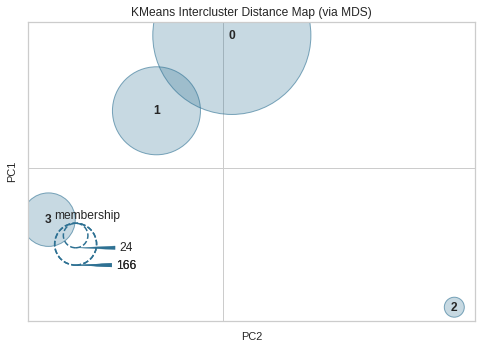

In [116]:
visualizer = InterclusterDistance(cluster.KMeans(4))#Can change k
visualizer.fit(X_v) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [117]:
svd = TruncatedSVD(n_components=2,n_iter=10)
normalizer = Normalizer(copy=False)#Since LSA/SVD results are not normalized, we have to redo the normalization.
lsa = make_pipeline(svd, normalizer)
X_M = svd.fit_transform(X_m)
X_V= svd.fit_transform(X_v)

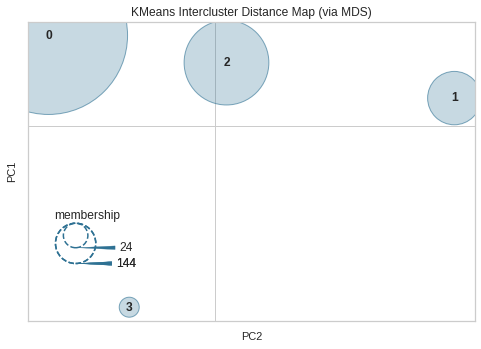

In [118]:
visualizer = InterclusterDistance(cluster.KMeans(4))#Can change k
visualizer.fit(X_V) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [119]:
from sklearn.cluster import KMeans
wcss_V= []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X_V)
    wcss_V.append(kmeans.inertia_)
wcss_M = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 100)
    kmeans.fit(X_M)
    wcss_M.append(kmeans.inertia_)

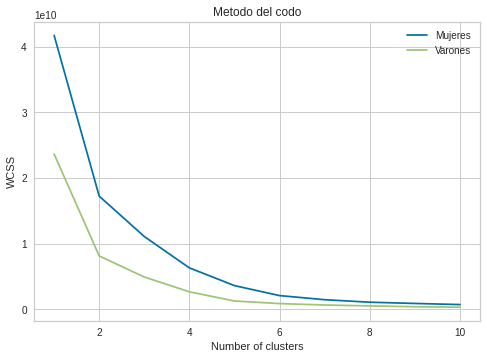

In [120]:
plt.plot(range(1, 11), wcss_M, label='Mujeres')   
plt.plot(range(1, 11), wcss_V, label='Varones')
plt.title('Metodo del codo')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [121]:
#Mujeres
kmeansM = KMeans(n_clusters = 4, init = 'k-means++', random_state = 80)
y_kmeans_M = kmeansM.fit_predict(X_M)
#Varones
kmeansV = KMeans(n_clusters = 4, init = 'k-means++', random_state = 80)
y_kmeans_V = kmeansV.fit_predict(X_V)

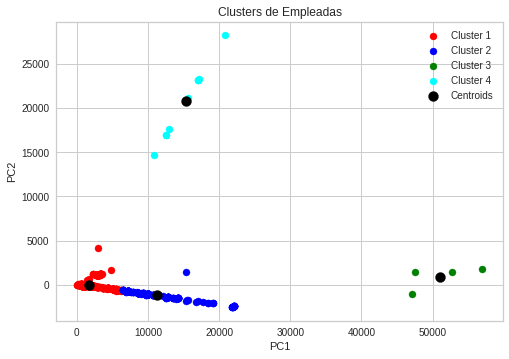

In [122]:
#Mujeres
plt.scatter(X_M[y_kmeans_M == 0, 0], X_M[y_kmeans_M== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_M[y_kmeans_M == 1, 0], X_M[y_kmeans_M == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_M[y_kmeans_M == 2, 0], X_M[y_kmeans_M == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_M[y_kmeans_M == 3, 0], X_M[y_kmeans_M == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X_M[y_kmeans_M == 4, 0], X_M[y_kmeans_M == 4, 1], s = 50, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeansM.cluster_centers_[:, 0], kmeansM.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters de Empleadas')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

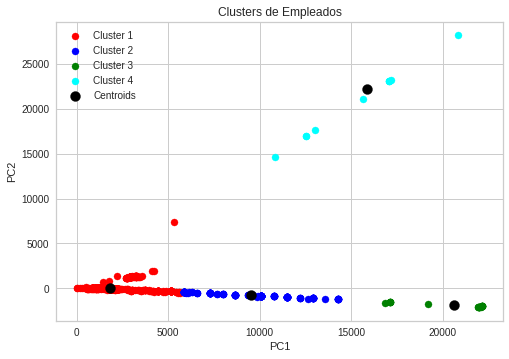

In [123]:
#Varones
plt.scatter(X_V[y_kmeans_V == 0, 0], X_V[y_kmeans_V== 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X_V[y_kmeans_V == 1, 0], X_V[y_kmeans_V == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X_V[y_kmeans_V == 2, 0], X_V[y_kmeans_V == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X_M[y_kmeans_M == 3, 0], X_M[y_kmeans_M == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X_M[y_kmeans_M == 4, 0], X_M[y_kmeans_M == 4, 1], s = 50, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeansV.cluster_centers_[:, 0], kmeansV.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('Clusters de Empleados')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [124]:
centroids_M = kmeansM.cluster_centers_
original_space_centroids = svd.inverse_transform(centroids_M)
order_centroids = original_space_centroids.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" %i, end='')
    for ind in original_space_centroids[i, :10]:
        print(' %s' % ind, end='')
        print()

Cluster 0: 1.1638519343908464
 1103.4298288406303
 97.93910936371684
 44.802943233047664
 14.788301689353403
 70.12921532045563
 1316.442244813252
 0.2678187782872851
 0.0
Cluster 1: 7.5179652890578526
 7826.059080179681
 -307.4789904441231
 156.35830828461064
 88.35453043415477
 483.64990021940383
 8159.024134687133
 1.7452136153666118
 0.0
Cluster 2: 34.560132830145015
 32366.97046378676
 3445.300489187338
 1406.409007700445
 443.2294469628553
 2064.9534255597164
 39288.096586651445
 7.944078663586088
 0.0
Cluster 3: 11.913864044793804
 -563.4916874403483
 16965.988614869
 2717.818752743316
 273.15173430637884
 197.50253076459
 19327.344235928904
 2.4830500264281956
 0.0


In [125]:
centroids_V = kmeansV.cluster_centers_
original_space_centroids = svd.inverse_transform(centroids_V)
order_centroids = original_space_centroids.argsort()[:, ::-1]
#terms = vectorizer.get_feature_names()
for i in range(4):
    print("Cluster %d:" %i, end='')
    for ind in original_space_centroids[i, :10]:
        print(' %s' % ind, end='')
        print()

Cluster 0: 1.251716443711148
 1171.3984316069166
 125.97488367748261
 51.1066235373406
 16.06219608763326
 74.7506995029837
 1423.3928918249974
 0.2877033858225879
 0.0
Cluster 1: 6.386316035966767
 6535.3273875193445
 -109.47913433919283
 154.29363794096923
 76.21217818699549
 405.9023197755469
 6986.491245821406
 1.4800568212086165
 0.0
Cluster 2: 13.797208689912733
 14223.320755948223
 -376.7652239095515
 313.4935132693669
 163.58153196014914
 881.4964973277413
 15042.440336666632
 3.1998347550933874
 0.0
Cluster 3: 12.347640716843763
 -931.5483108928923
 18051.54113256849
 2882.9816911390135
 286.6656721038865
 189.44297715972465
 20202.527181523266
 2.565880728079369
 0.0
